## Anomaly Detection

- Task: Find Images which are not normal but show some kind of abnormality 
- Dataset: Cropped and Resized Images
- Original Colorscheme

Generator
- Scaling of data and reading in batches on the fly

Model
- Two conv layers followed by Pooling layer with max pooling
- 32 Filters in first block, 64 in second, 128 in third
- Kernel Size 3,3
- Activation Relu
- Kernel Initializer: https://arxiv.org/abs/1502.01852
- padding = same

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import SGD

In [3]:
df = pd.read_csv('train_binary.csv')

In [4]:
df.shape

(6060, 2)

In [5]:
df.head()

,filename,normal
0,c24a1b14d253.jpg,0
1,9ee905a41651.jpg,0
2,3f58d128caf6.jpg,0
3,4ce6599e7b20.jpg,0
4,0def470360e4.jpg,0


In [6]:
df.dtypes

filename    object
normal       int64
dtype: object

In [7]:
# Keras Gen needs str for Classes
df.normal = df.normal.astype('str')

In [8]:
# check vales
df.normal.value_counts()

1    3150
0    2910
Name: normal, dtype: int64

In [9]:
# As data is ordered in dataframe after augmentation, shuffle it
from sklearn.utils import shuffle 
df = shuffle(df)

In [10]:
# Directory
indir = r'D:\data\Projects\notebooks\RetinaAI\Anomaly Detection\train'

In [11]:
datagen = ImageDataGenerator(rescale=1./255., validation_split = 0.25)

In [12]:
train_gen = datagen.flow_from_dataframe(dataframe = df, 
                                            directory = indir, 
                                            x_col = "filename", 
                                            y_col = 'normal',
                                            batch_size = 100, 
                                            seed = 2, 
                                            shuffle = True, 
                                            class_mode = "binary", 
                                            target_size = (300,300),
                                            subset='training')

Found 4545 validated image filenames belonging to 2 classes.


In [13]:
val_gen = datagen.flow_from_dataframe(dataframe = df, 
                                            directory = indir, 
                                            x_col = "filename", 
                                            y_col = 'normal',
                                            batch_size = 100, 
                                            seed = 2, 
                                            shuffle = True, 
                                            class_mode = "binary", 
                                            target_size = (300,300),
                                            subset='validation')

Found 1515 validated image filenames belonging to 2 classes.


In [14]:
imgs, labels = next(train_gen)

In [15]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

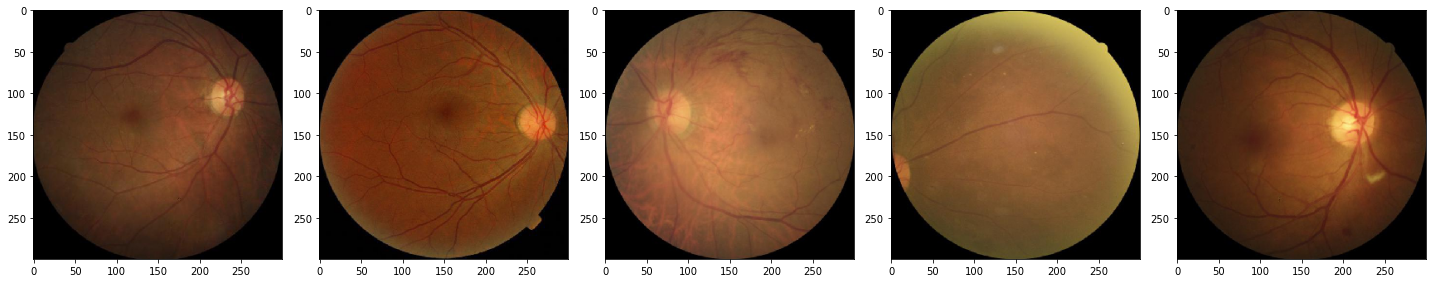

In [17]:
plotImages(imgs)

In [18]:
early_stopping = EarlyStopping(patience=5)

In [19]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(300,300,3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))


In [20]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [21]:
step_size_train = train_gen.n//train_gen.batch_size
step_size_val = val_gen.n//val_gen.batch_size

In [22]:
history = model.fit(x=train_gen, validation_data=val_gen, steps_per_epoch=step_size_train, 
          validation_steps=step_size_val, epochs=20, callbacks=[early_stopping],verbose=2)

Epoch 1/20
45/45 - 282s - loss: 0.4769 - accuracy: 0.7678 - val_loss: 0.3802 - val_accuracy: 0.8533
Epoch 2/20
45/45 - 42s - loss: 0.2627 - accuracy: 0.9004 - val_loss: 0.2255 - val_accuracy: 0.9007
Epoch 3/20
45/45 - 41s - loss: 0.2217 - accuracy: 0.9208 - val_loss: 0.1845 - val_accuracy: 0.9333
Epoch 4/20
45/45 - 42s - loss: 0.1591 - accuracy: 0.9431 - val_loss: 0.1462 - val_accuracy: 0.9567
Epoch 5/20
45/45 - 41s - loss: 0.1518 - accuracy: 0.9458 - val_loss: 0.1468 - val_accuracy: 0.9460
Epoch 6/20
45/45 - 41s - loss: 0.1503 - accuracy: 0.9478 - val_loss: 0.1310 - val_accuracy: 0.9527
Epoch 7/20
45/45 - 41s - loss: 0.1192 - accuracy: 0.9611 - val_loss: 0.0995 - val_accuracy: 0.9633
Epoch 8/20
45/45 - 41s - loss: 0.0985 - accuracy: 0.9696 - val_loss: 0.0937 - val_accuracy: 0.9640
Epoch 9/20
45/45 - 42s - loss: 0.1015 - accuracy: 0.9672 - val_loss: 0.1421 - val_accuracy: 0.9447
Epoch 10/20
45/45 - 40s - loss: 0.0920 - accuracy: 0.9701 - val_loss: 0.0931 - val_accuracy: 0.9653
Epoch 11

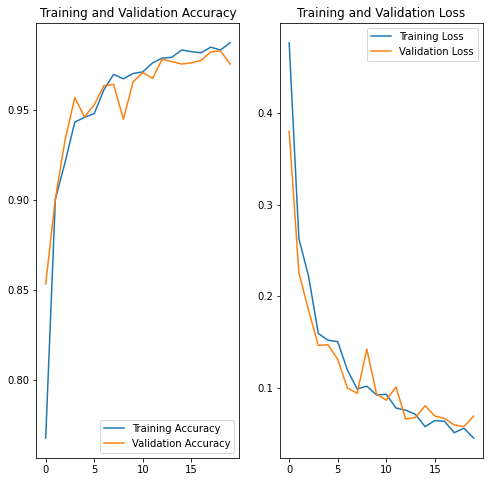

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
model.save('/content/drive/MyDrive/Binary Classification/Anomaly')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Binary Classification/Anomaly/assets
